### Import dataset

In [1]:
# import module
import pandas as pd
  
# assign dataset names
list_of_names = ['trafficData158324','trafficData158355','trafficData158386']
  
# create empty list
dataframes_list = []
  
# append datasets into teh list
for i in range(len(list_of_names)):
    df = pd.read_csv(list_of_names[i]+".csv",parse_dates=True, index_col='TIMESTAMP')
    dataframes_list.append(df)
df_final = pd.concat(dataframes_list)
df_final.shape

(92845, 8)

In [2]:
df_final.describe()

,avgMeasuredTime,avgSpeed,extID,medianMeasuredTime,vehicleCount,_id,REPORT_ID
count,92845.000000,92845.000000,92845.000000,92845.000000,92845.000000,9.284500e+04,92845.000000
mean,93.654596,68.991631,755.110614,93.654596,4.111035,7.272837e+06,158353.882137
std,57.728245,16.379122,114.083390,57.728245,4.916327,4.089541e+06,25.061791
min,0.000000,0.000000,668.000000,0.000000,0.000000,1.900000e+05,158324.000000
25%,52.000000,57.000000,668.000000,52.000000,0.000000,3.732035e+06,158324.000000
50%,62.000000,66.000000,690.000000,62.000000,2.000000,7.271610e+06,158355.000000
75%,154.000000,81.000000,925.000000,154.000000,6.000000,1.081665e+07,158386.000000
max,501.000000,148.000000,925.000000,501.000000,53.000000,1.435406e+07,158386.000000


### Data Pre-processing 

In [3]:
df_final = df_final.replace(to_replace = 668, value =1)

In [4]:
df_final = df_final.replace(to_replace = 690, value =2)

In [5]:
df_final = df_final.replace(to_replace = 925, value =3)

In [6]:
df_final.drop('_id', axis=1, inplace=True)
df_final.drop('status', axis=1, inplace=True)
df_final.drop('REPORT_ID', axis=1, inplace=True)
df_final.drop('avgMeasuredTime', axis=1, inplace=True)
df_final.drop('avgSpeed', axis=1, inplace=True)
df_final.drop('medianMeasuredTime', axis=1, inplace=True)

In [7]:
# extract year from date
df_final['Year'] = pd.Series(df_final.index).apply(lambda x: x.year).to_list()

# extract month from date
df_final['Month'] = pd.Series(df_final.index).apply(lambda x: x.month).to_list()

# extract day from date
df_final['Day'] = pd.Series(df_final.index).apply(lambda x: x.day).to_list()

# extract hour from date
df_final['Hour'] = pd.Series(df_final.index).apply(lambda x: x.hour).to_list()

# extract weekday from date
df_final['weekday'] = pd.Series(df_final.index).apply(lambda x: x.weekday()).to_list()


In [8]:
print(df_final.head())

                     extID  vehicleCount  Year  Month  Day  Hour  weekday
TIMESTAMP                                                                
2014-02-13 11:30:00      1             7  2014      2   13    11        3
2014-02-13 11:35:00      1             5  2014      2   13    11        3
2014-02-13 11:40:00      1             6  2014      2   13    11        3
2014-02-13 11:45:00      1             3  2014      2   13    11        3
2014-02-13 11:50:00      1             6  2014      2   13    11        3


### Histogram

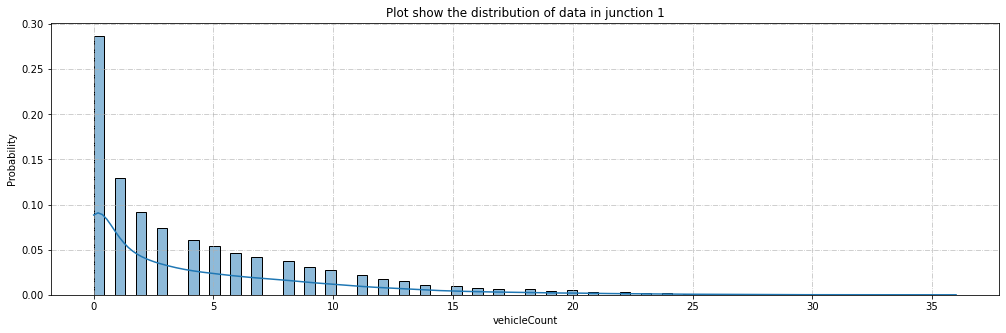

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

#Data Exploration
def make_hist(extID =1):
    data = df_final[df_final['extID'] == extID]
    f, ax = plt.subplots(figsize=(17, 5))
    ax = sns.histplot(data['vehicleCount'], kde=True, stat='probability')
    ax.set_title(f'Plot show the distribution of data in junction {extID}')
    ax.grid(True, ls='-.', alpha=0.75)
    plt.show()
make_hist(1)

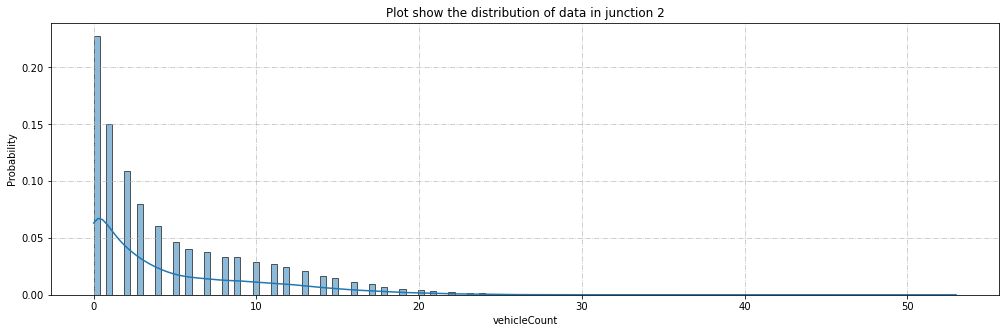

In [12]:
make_hist(2)

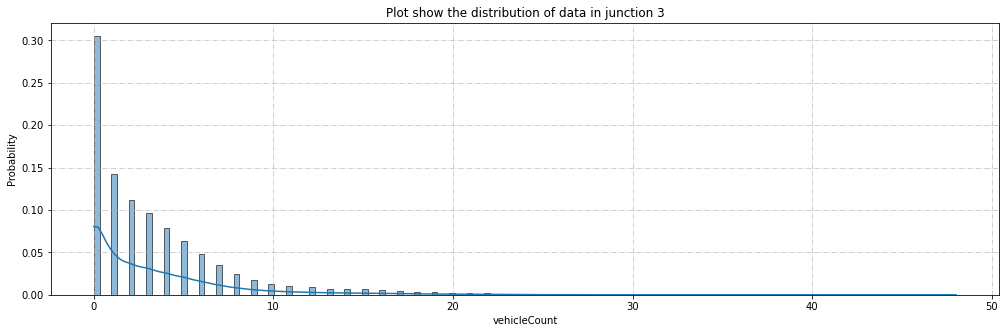

In [13]:
make_hist(3)

In [14]:
df_final.tail(1).Year[0]

2014

### Time series plot

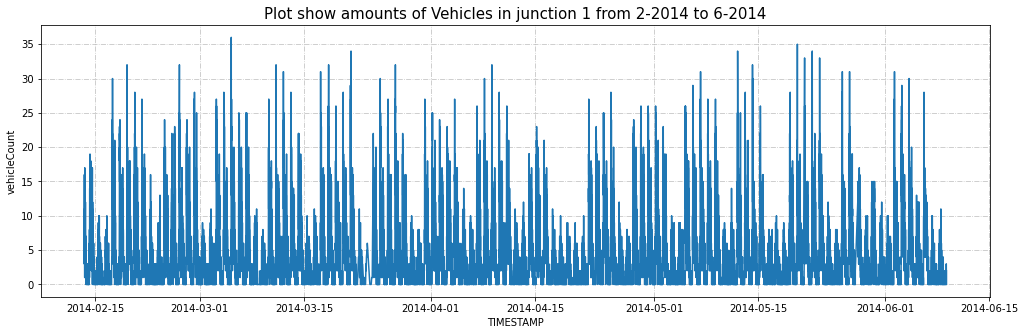

In [15]:
def make_time_series_plot(extID = 1):
    f, ax = plt.subplots(figsize=(17, 5))
    data=df_final[df_final.extID == extID]
    ax = sns.lineplot(data=data, y='vehicleCount', x='TIMESTAMP', ax=ax)
    start = data.head(1)
    end = data.tail(1)
    ax.set_title(f'Plot show amounts of Vehicles in junction {extID} from {start.Month[0]}-{start.Year[0]} to {end.Month[0]}-{end.Year[0]}', fontsize=15)
    ax.grid(True, ls='-.', alpha=0.75)
    plt.show()
make_time_series_plot(1)

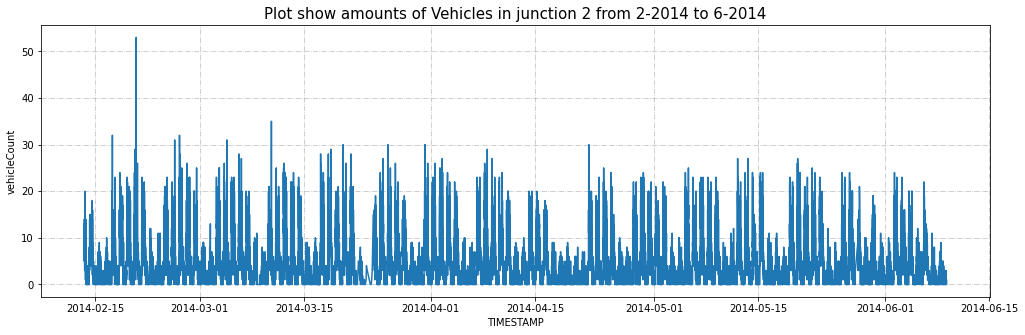

In [16]:
make_time_series_plot(2)

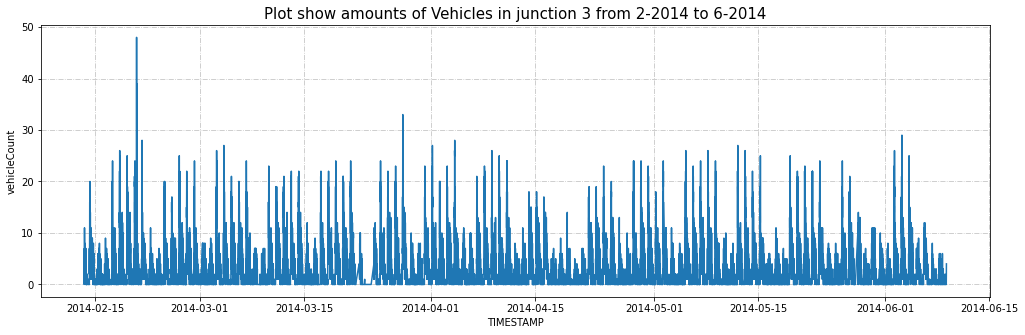

In [17]:
make_time_series_plot(3)

## Random forest


#### Preparing data for training 

In [19]:
X = df_final[['Year','Month','Day','Hour','weekday','extID']]
y = df_final['vehicleCount']
  
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#### Training and Testing Sets 

In [20]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (74276, 6)
Training Labels Shape: (74276,)
Testing Features Shape: (18569, 6)
Testing Labels Shape: (18569,)


#### Feature Scaling

In [21]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### Training the algorithm

In [22]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=200, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

#### Prediction 

In [23]:
#importing Random forest
from sklearn.ensemble import RandomForestRegressor
  
#defining the RandomForestRegressor
m1=RandomForestRegressor()
  
m1.fit(X,y)
#testing
m1.predict([[2014, 4, 27, 10, 3, 2]])

array([7.44733759])

#### Evaluating the Algorithm

In [24]:
from sklearn import metrics
import numpy as np

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 1.6682461289589907
Mean Squared Error: 6.525955904759187
Root Mean Squared Error: 2.5545950569041636
R2: 0.7162904832570277
